# Computational Physics
## Radioactive Decay

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Alpha_Decay.svg/500px-Alpha_Decay.svg.png" width=400px>

In [1]:
'''import style
style._set_css_style('../include/bootstrap.css')'''

"import style\nstyle._set_css_style('../include/bootstrap.css')"

## Last Time

### [Notebook Link: 11_PlotTypes.ipynb](./11_PlotTypes.ipynb)

- plot types in Matplotlib
- graphical solutions of transcendental equations

## Today

- Radioactive Decay
- **Reading:** G&N Chapter 1


## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Radioactive Decay

We want to analyze the radioactive decay of some sample where there are $N(t)$ atoms at some time $t$.  The behavior of $N(t)$ is governed by the differential equation:

\begin{equation}
\frac{dN}{dt} = -\frac{N}{\tau}
\tag{1}
\end{equation}

where $\tau$ is the time constant of the decay.  The solution to this first order differential equation can be found by separation and integration:

\begin{align}
\int_{N(0)}^{N(t)} \frac{dN}{N} &= - \int_0^t \frac{dt}{\tau} \\
\log\frac{N(t)}{N(0)} &= -\frac{t}{\tau} \\
N(t) &= N(0) \mathrm{e}^{-t/\tau}
\end{align}

### Plot $N(t)/N(0)$ vs. $t/\tau$

Text(0.5, 0, '$t/\\tau$')

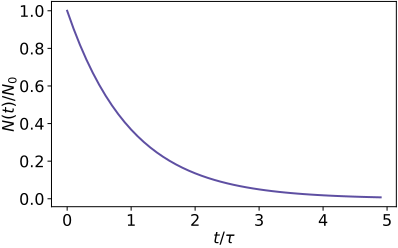

In [3]:
t = np.arange(0,5,0.1)
plt.plot(t,np.exp(-t))
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$t/\tau$')

## A Numerical Approach

### Question: How do we approximate the ODE on a discrete set of grid points?

### Taylor Expansions

\begin{equation}
f(t+\Delta t) = f(t) + \frac{df}{dt}\Delta t + \frac{1}{2} \frac{d^2 f}{dt^2} \Delta t^2 + \mathrm{O}\left(\Delta t^3\right)
\end{equation}

if $\Delta t \ll 1$ we can rearrange to get the discrete **forward derivative**:

\begin{equation}
\frac{df(t)}{dt} = \frac{f(t+\Delta t) - f(t)}{\Delta t} + \mathrm{O}\left(\Delta t\right) .
\end{equation}

### Application to the Radioactive Decay Problem

We have:
\begin{align}
\frac{dN(t)}{dt} & = -\frac{N}{\tau} \\
\Rightarrow \frac{N(t+\Delta t) - N(t)}{\Delta t} &= -\frac{N(t)}{\tau} + \mathrm{O}\left(\Delta t\right) \\
N(t+\Delta t) &\approx \left(1-\frac{\Delta t}{\tau}\right)N(t)
\end{align}
 

If we define an array $t/\tau = n \Delta t$ where $n \in \mathbb{Z}$ is an integer then this is a simple iterative initial value problem.  The **accuracy** of the numerical solution depends on the size of $\Delta t$.  This approach using the lowest order approximation to the derivative is called the [Euler's Method](https://en.wikipedia.org/wiki/Euler_method).

<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
Write a program that employs the Euler Method to solve the radioactive decay problem and compare with the exact solution.
</div>


Text(0, 0.5, '$N(t+\\Delta t)/N_0$')

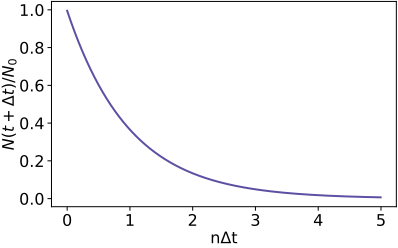

In [57]:
#calculate 1-dt/tau
halflives = 5
ntot = 1000
dt =halflives/ntot 
#Nt = ntot/dt
Nt=1
n = [i for i in range(ntot)]
Nt0 = Nt

N=[]
for i in n:
    Nt = Nt*(1-dt)
    N.append(Nt)


plt.plot([i*dt for i in n], [i/Nt0 for i in N])

plt.xlabel(r'n$\Delta$t')
plt.ylabel(r'$N(t+\Delta t)/N_0$')


In [ ]:
%run ./examples/Simple_ODEs/radioactive_decay.py

Exception: File `'./examples/Simple_ODEs/radioactive_decay.py'` not found.

In [ ]:
%load ./examples/Simple_ODEs/radioactive_decay.py